<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/regression/curse_of_dimensionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/pharringtonp19/business-analytics.git

fatal: destination path 'business-analytics' already exists and is not an empty directory.


### **Import Packages**

In [14]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import jax.numpy as jnp
import jax
import seaborn as sb
from functools import partial
from tqdm import tqdm
import textwrap
import math

### **Read In Data Set**

In [3]:
df = pd.read_csv('/content/business-analytics/datasets/CASchools.csv')
df['Students_per_Teacher'] = df['students'] / df['teachers']
df.head()

,Unnamed: 0,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,Students_per_Teacher
0,1,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000,17.889909
1,2,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024,21.524664
2,3,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024,18.697225
3,4,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000,17.357143
4,5,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024,18.671329


### **Functions**

In [4]:
@partial(jax.jit, static_argnums=(2,))
def closest_distance(matrix, i, k):
    # Calculate squared differences to avoid computing the norm for each element separately
    squared_diffs = jnp.square(matrix - matrix[i])

    # Sum along axis 1 to get squared Euclidean distances directly
    negated_squared_distances = -jnp.sum(squared_diffs, axis=1)

    top_k_negated_distances, _ = jax.lax.top_k(negated_squared_distances, k+1)

    return jnp.sqrt(-top_k_negated_distances[-1])

def avg_closest_distance(matrix, k):
  ids = jnp.arange(0, matrix.shape[0])
  distance = jax.vmap(partial(closest_distance, matrix, k=k))(ids)
  return jnp.mean(distance)

In [5]:
matrix = jax.random.normal(jax.random.PRNGKey(1), shape=(10_000, 1))
avg_closest_distance(matrix, 5)

Array(0.00194423, dtype=float32)

In [ ]:
def approx_distance(k, n):
  return k * math.sqrt(2*math.pi) / n

In [27]:
neighbors = list(range(1, 20, 1))
populations = [100, 500, 1000, 5000, 10000]
Results = {}

for k in neighbors:
  results = []
  for n in populations:
    results.append(approx_distance(k, n))
  Results[k] = results

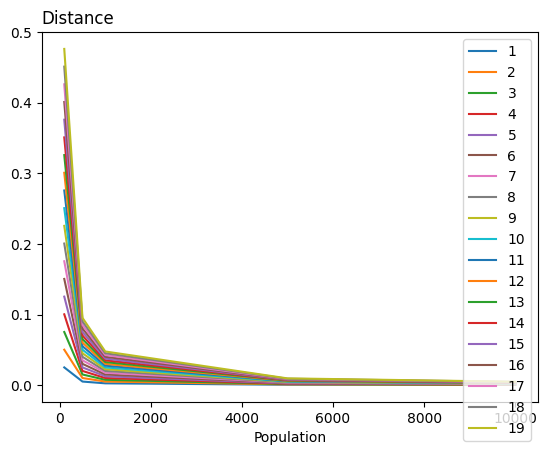

In [28]:
for k in neighbors:
  plt.plot(populations, Results[k], label=k)
plt.legend()
plt.title('Distance', loc='left')
plt.xlabel('Population')
plt.show()

### **For-loop**

In [6]:
# continuous_df = df.loc[:, 'students':'math']
# continuous_df = (continuous_df - continuous_df.mean()) / continuous_df.std()
# Results = {}
# rs = range(1, 20, 2)
# for i in rs:
#   results = []
#   for j in range(1, 11):
#     matrix = jax.random.normal(jax.random.PRNGKey(1), shape=(500, j))
#     print(matrix.shape)
#     ans = avg_closest_distance(matrix, i)
#     results.append(ans)
#   Results[i] = results

(500, 1)
(500, 2)
(500, 3)
(500, 4)
(500, 5)
(500, 6)
(500, 7)
(500, 8)
(500, 9)
(500, 10)
(500, 1)
(500, 2)
(500, 3)
(500, 4)
(500, 5)
(500, 6)
(500, 7)
(500, 8)
(500, 9)
(500, 10)
(500, 1)
(500, 2)
(500, 3)
(500, 4)
(500, 5)
(500, 6)
(500, 7)
(500, 8)
(500, 9)
(500, 10)
(500, 1)
(500, 2)
(500, 3)
(500, 4)
(500, 5)
(500, 6)
(500, 7)
(500, 8)
(500, 9)
(500, 10)
(500, 1)
(500, 2)
(500, 3)
(500, 4)
(500, 5)
(500, 6)
(500, 7)
(500, 8)
(500, 9)
(500, 10)
(500, 1)
(500, 2)
(500, 3)
(500, 4)
(500, 5)
(500, 6)
(500, 7)
(500, 8)
(500, 9)
(500, 10)
(500, 1)
(500, 2)
(500, 3)
(500, 4)
(500, 5)
(500, 6)
(500, 7)
(500, 8)
(500, 9)
(500, 10)
(500, 1)
(500, 2)
(500, 3)
(500, 4)
(500, 5)
(500, 6)
(500, 7)
(500, 8)
(500, 9)
(500, 10)
(500, 1)
(500, 2)
(500, 3)
(500, 4)
(500, 5)
(500, 6)
(500, 7)
(500, 8)
(500, 9)
(500, 10)
(500, 1)
(500, 2)
(500, 3)
(500, 4)
(500, 5)
(500, 6)
(500, 7)
(500, 8)
(500, 9)
(500, 10)


In [7]:
# continuous_df = df.loc[:, 'students':'math']
# continuous_df = (continuous_df - continuous_df.mean()) / continuous_df.std()
# Results = {}
# rs = range(1, 20, 2)
# for i in rs:
#   results = []
#   for column in continuous_df.columns:
#     matrix = jnp.array(continuous_df.loc[:, 'students':column].values)
#     print(matrix.shape)
#     ans = avg_closest_distance(matrix, i)
#     results.append(ans)
#   Results[i] = results


In [11]:
avg_closest_distance(matrix, 1)

Array(1.965065, dtype=float32)

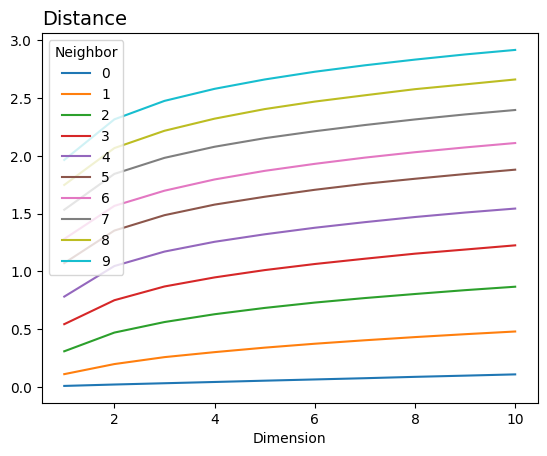

In [12]:
for p in range(len(Results[1])):
  plt.plot(list(range(1, 11)), [Results[key][p] for key in Results.keys()], label=p)
plt.legend(title='Neighbor')
plt.xlabel('Dimension')
plt.title('Distance', loc='left', size=14)
plt.show()

### **Plot**

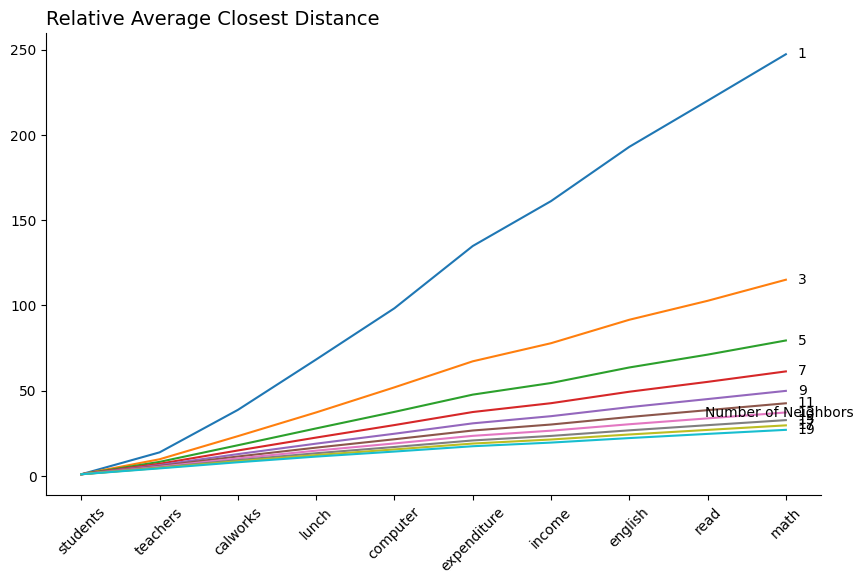

In [13]:
plt.figure(figsize=(10, 6))

# Plot each line and annotate the end with the label
for i in rs:
    y_values = np.array(Results[i]) / Results[i][0]
    plt.plot(continuous_df.columns, y_values)

    # Annotate the end of each line
    note = f"{i}"  # Customize or use `i` or another label as needed
    plt.annotate(
        textwrap.fill(note, width=120),
        xy=(.97, y_values[-1]),  # Set x to 1 (end of x-axis), y to last y value in the series
        xycoords=('axes fraction', 'data'),  # Position relative to axis and data
        ha='left',
        va="center",
        fontsize=10
    )
plt.annotate(
    textwrap.fill('Number of Neighbors', width=120),
    xy=(0.85, y_values[-1]+ 10),  # Set x to 1 (end of x-axis), y to last y value in the series
    xycoords=('axes fraction', 'data'),  # Position relative to axis and data
    ha='left',
    va="center",
    fontsize=10
)
plt.title('Relative Average Closest Distance', loc='left', size=14)
plt.xticks(rotation=45)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()